In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from __future__ import division

import pymc as pm
import random

## Two-player TrueSkill Implementation

This is a simple example of the TrueSkill model for two players implemented in PyMC3

In [3]:
mu1 = pm.Normal('mu1', mu=0, tau=1/9)
mu2 = pm.Normal('mu2', mu=0, tau=1/9)

sd1 = pm.Gamma('sd1', 1, 1)
sd2 = pm.Gamma('sd2', 1, 1)

beta = pm.Gamma('beta', 1, 1)

skill1 = pm.Normal('skill1', mu=mu1, tau=1/(sd1**2))
skill2 = pm.Normal('skill2', mu=mu2, tau=1/(sd2**2))

perf1 = pm.Normal('perf1', mu=skill1, tau=1/(beta**2))
perf2 = pm.Normal('perf2', mu=skill2, tau=1/(beta**2))

@pm.deterministic
def p1wins(perf1=perf1, perf2=perf2):
    delta = perf1 - perf2
    return 1.0 / (1 + np.exp(-delta))

outcome = pm.Bernoulli('outcome', p=p1wins, observed=True, value=[1 if random.random() < 0.9 else 0 for _ in range(1000)])

In [4]:
model = pm.Model([mu1, mu2, sd1, sd2, perf1, perf2, p1wins, outcome])

In [5]:
mcmc = pm.MCMC(model)

In [6]:
mcmc.sample(50000, burn=2000, thin=5)

 [-----------------100%-----------------] 50000 of 50000 complete in 13.9 sec

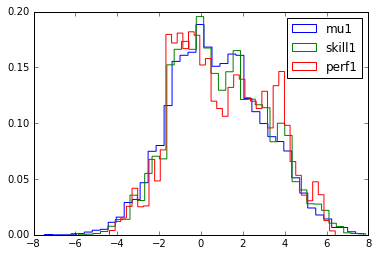

In [7]:
hist(mcmc.trace('mu1')[:], 40, histtype='step', label='mu1', normed=True);
hist(mcmc.trace('skill1')[:], 40, histtype='step', label='skill1', normed=True);
hist(mcmc.trace('perf1')[:], 40, histtype='step', label='perf1', normed=True);
legend();

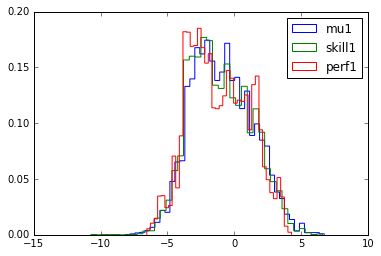

In [8]:
hist(mcmc.trace('mu2')[:], 40, histtype='step', label='mu1', normed=True);
hist(mcmc.trace('skill2')[:], 40, histtype='step', label='skill1', normed=True);
hist(mcmc.trace('perf2')[:], 40, histtype='step', label='perf1', normed=True);
legend();

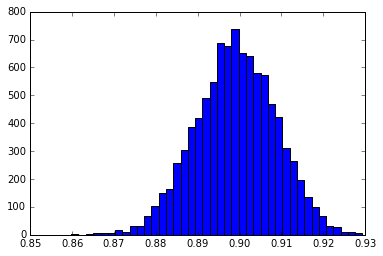

In [9]:
hist(mcmc.trace('p1wins')[:], 40);